# How to Create Effective and Engaging Data Visualizations with Jupyter Notebooks
Data visualization is the art and science of transforming data into visual forms that can communicate insights, patterns, trends, and relationships. Data visualization can help us understand complex data sets, tell compelling stories with data, and persuade our audience with evidence.

But how can we create effective and engaging data visualizations that stand out from the crowd? In this blog post, I will share some data visualization best practices and show you how to apply them using Jupyter notebooks, a powerful tool for interactive data analysis and presentation.

### What is Jupyter Notebook?
Jupyter notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations, and narrative text. You can use Jupyter notebook for data cleaning, transformation, exploration, modeling, visualization, machine learning, and much more.

Jupyter notebook supports multiple programming languages, such as Python, R, Julia, and Scala. You can also use various libraries and frameworks, such as pandas, numpy, matplotlib, seaborn, plotly, scikit-learn, tensorflow, and pytorch, to enhance your data analysis and visualization capabilities.

One of the main advantages of Jupyter notebook is that it enables you to combine code, output, and explanation in a single document, making your work more transparent, reproducible, and shareable. You can also export your notebook as HTML, PDF, or slides, or publish it online using platforms like Binder, Colab, or GitHub.

### Data Visualization Best Practices
Let’s review some data visualization best practices that can help us create better charts and graphs.

But before we start dealing with data, let's first import some python libraries.
We will use pandas, numpy, matplotlib, and seaborn for this example. You can install these libraries using pip or conda, or use a pre-installed environment such as Anaconda.

To import the libraries, we can use the following code:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import data
df = pd.read_csv("fortune500.csv")
df.head() # Read the first 5 rows in a dataframe

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


We can see that the data frame has six columns: Year, Rank, Company, Revenue, and Profit. The data frame has 25,500 rows, one for each company listed in the Fortune 500 from 1955 to 2005.

### Exploring and cleaning the data
The next step is to explore and clean the data, to make sure that it is accurate, complete, and consistent. We can use various pandas methods and attributes to check the basic information, summary statistics, and missing values of the data frame.

In [4]:
# Check for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


We can see that the data frame has 25,500 non-null entries, and that the data types are mostly numeric, except for the Company and Profit columns, which are objects. This is strange, because we would expect the Profit column to be numeric as well. Let’s investigate this further.

In [5]:
# Check summary statistics of the dataframe
df.describe()

,Year,Rank,Revenue (in millions)
count,25500.00000,25500.000000,25500.000000
mean,1980.00000,250.499765,4273.329635
std,14.71989,144.339963,11351.884979
min,1955.00000,1.000000,49.700000
25%,1967.00000,125.750000,362.300000
50%,1980.00000,250.500000,1019.000000
75%,1993.00000,375.250000,3871.000000
max,2005.00000,500.000000,288189.000000


In [16]:
df.drop(df[df['Profit (in millions)'] == 'N.A.'].index, inplace=True)

In [17]:
df['Profit (in millions)'] = df['Profit (in millions)'].astype(float).astype(int)

In [18]:
df.describe()

,Year,Rank,Revenue (in millions),Profit (in millions)
count,25131.000000,25131.000000,25131.000000,25131.000000
mean,1979.926784,249.744777,4304.961780,207.578688
std,14.764827,144.443000,11396.723687,1173.703728
min,1955.000000,1.000000,49.700000,-98696.000000
25%,1967.000000,124.000000,357.900000,8.000000
50%,1980.000000,250.000000,1017.600000,35.000000
75%,1993.000000,375.000000,3916.100000,150.000000
max,2005.000000,500.000000,288189.000000,25330.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25131 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25131 non-null  int64  
 1   Rank                   25131 non-null  int64  
 2   Company                25131 non-null  object 
 3   Revenue (in millions)  25131 non-null  float64
 4   Profit (in millions)   25131 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 1.1+ MB


You risk to make misinterpretation in your visualization if you do not clean it first.
Now that we have cleaned the data,  let's do the visualization now.

#### 1. Choose the right chart type
Different chart types have different strengths and weaknesses, and can convey different meanings and impressions. You should choose the chart type that best suits your data type, structure, and distribution, as well as your message and goal.

Some common chart types and their use cases are:

- Bar charts: for comparing categories within a single measure
- Line charts: for showing changes over time or across a continuous variable
- Scatter plots: for showing relationships between two numeric variables
- Pie charts: for showing proportions of a whole
- Histograms: for showing frequency distributions of a single numeric variable
- Box plots: for showing summary statistics and outliers of a numeric variable
- Maps: for showing geographic or spatial data
- Heat maps: for showing intensity or density of a variable across two dimensions
You can also combine multiple chart types to create more complex and interactive visualizations, such as dashboards, infographics, or animations.

We can use a line chart to show how the revenue and profit of the Fortune 500 companies changed over time, a bar chart to show the top 20 companies by number of appearances in the list, and a pie chart to show the proportion of industries in the list.

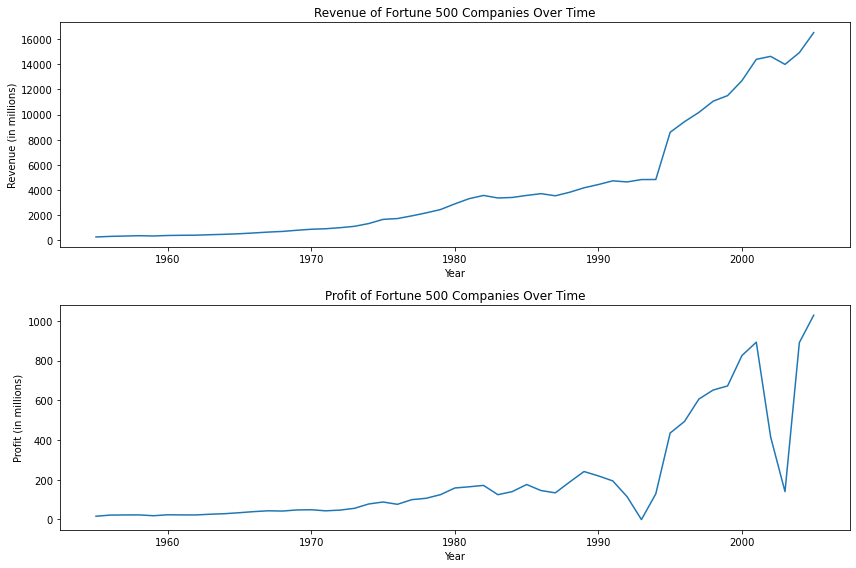

In [21]:
# Plot the revenue and profit over time
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.lineplot(data=df, x="Year", y="Revenue (in millions)", ci=None)
plt.title("Revenue of Fortune 500 Companies Over Time");
plt.ylabel("Revenue (in millions)");

plt.subplot(2,1,2)
sns.lineplot(data=df, x="Year", y="Profit (in millions)", ci=None)
plt.title("Profit of Fortune 500 Companies Over Time");
plt.ylabel("Profit (in millions)");

plt.tight_layout()

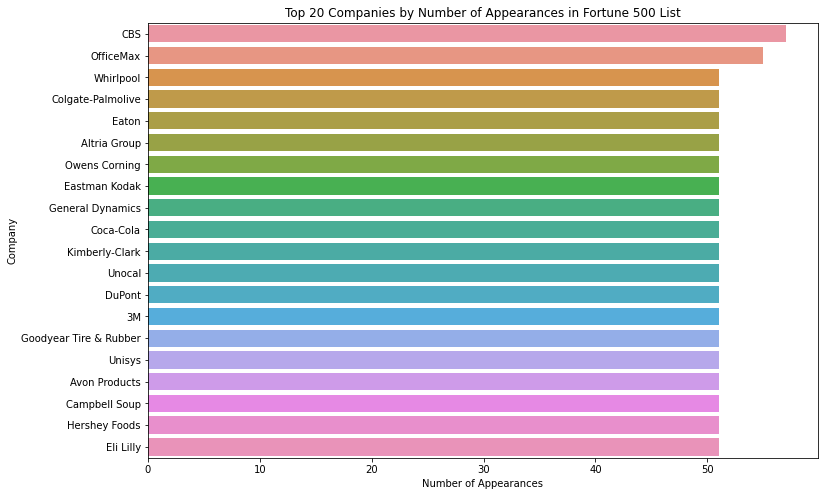

In [22]:
# Count the number of times each company appears in the list
counts = df["Company"].value_counts()

# Plot the top 20 companies by count
plt.figure(figsize=(12,8))
sns.barplot(x=counts[:20], y=counts[:20].index, orient="h")
plt.title("Top 20 Companies by Number of Appearances in Fortune 500 List");
plt.xlabel("Number of Appearances");
plt.ylabel("Company");

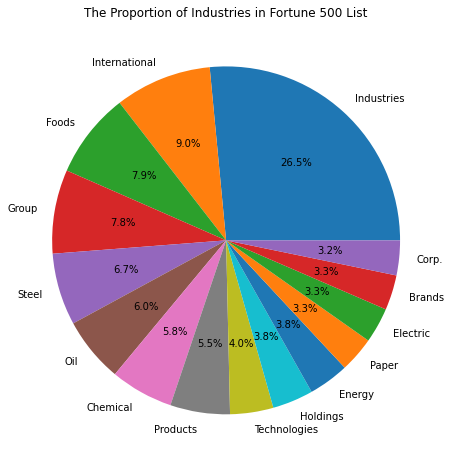

In [28]:
# Extract the industry from the company name
df["Industry"] = df["Company"].str.split().str[-1]

# Count the number of companies by industry
industries = df["Industry"].value_counts()
top_15 = industries[:15]

# Plot the proportion of industries in the list
plt.figure(figsize=(12,8))
plt.pie(x=top_15, labels=top_15.index, autopct="%1.1f%%");
plt.title("The Proportion of Industries in Fortune 500 List");

A pie chart is often vague because it is difficult to compare the relative sizes of the slices, especially when there are many categories or similar values. A pie chart also depends on the perception of angles, areas, and arc lengths, which can vary among different viewers. A stacked bar chart, on the other hand, allows for easier comparison of the values along a common axis, and does not rely on subjective interpretation of shapes.

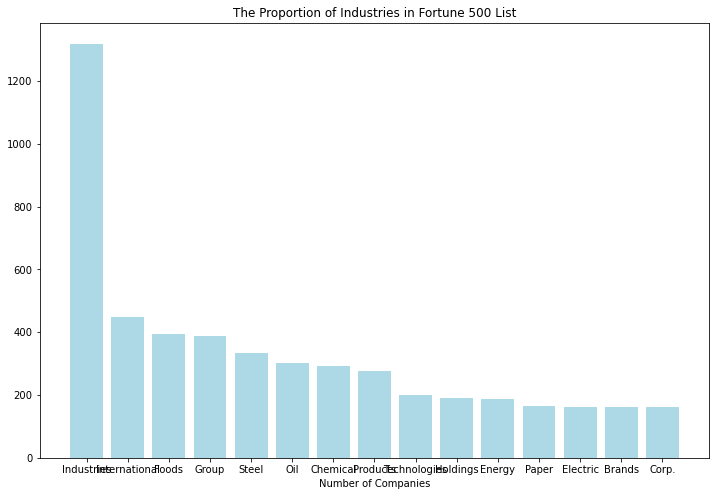

In [27]:
# Extract the industry from the company name
df["Industry"] = df["Company"].str.split().str[-1]

# Count the number of companies by industry
industries = df["Industry"].value_counts()

# Get the top 15 industries
top_15 = industries[:15]

# Plot the proportion of industries in the list
plt.figure(figsize=(12,8))
plt.bar(top_15.index, top_15, color="lightblue");
plt.xlabel("Number of Companies");
plt.title("The Proportion of Industries in Fortune 500 List");

#### 2. Use clear and concise labels
Labels are essential for making your visualization understandable and informative. Labels include titles, subtitles, captions, legends, axes, ticks, and annotations. You should use clear and concise labels that describe what your visualization shows, why it is important, and how to interpret it.

Some tips for creating effective labels are:

- Use descriptive and catchy titles that summarize your main message or finding
- Use subtitles or captions to provide additional context or explanation
- Use legends to explain the meaning of colors, shapes, or symbols
- Use axes and ticks to show the scale and range of your data
- Use annotations to highlight key points, trends, or outliers
- Use consistent and appropriate fonts, sizes, and colors for your labels
- Avoid cluttering your visualization with too many or too long labels

We can use different types of labels to provide the necessary information and explanation for our visualization, and to make it easy to read and understand. For example, we can use titles, subtitles, captions, legends, axes, ticks, and annotations.

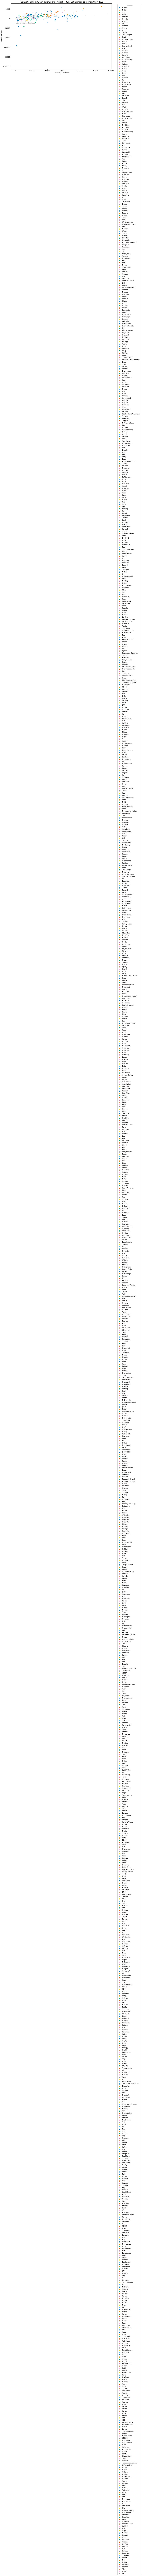

In [33]:
# Example of a scatter plot with labels
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Revenue (in millions)", y="Profit (in millions)", hue="Industry", style="Industry", palette="colorblind")
plt.title("The Relationship between Revenue and Profit of Fortune 500 Companies by Industry in 2005")
plt.xlabel("Revenue (in millions)")
plt.ylabel("Profit (in millions)")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1))
plt.text(300, -10000, "Data source: Fortune 500");

### 3. Know your audience and purpose
We can use different types of plots to suit different audiences and purposes. For example, if we want to show the relationship between two numeric variables, we can use a scatter plot. If we want to show the trend of a numeric variable over time, we can use an area chart. If we want to show the distribution of a numeric variable, we can use a histogram.

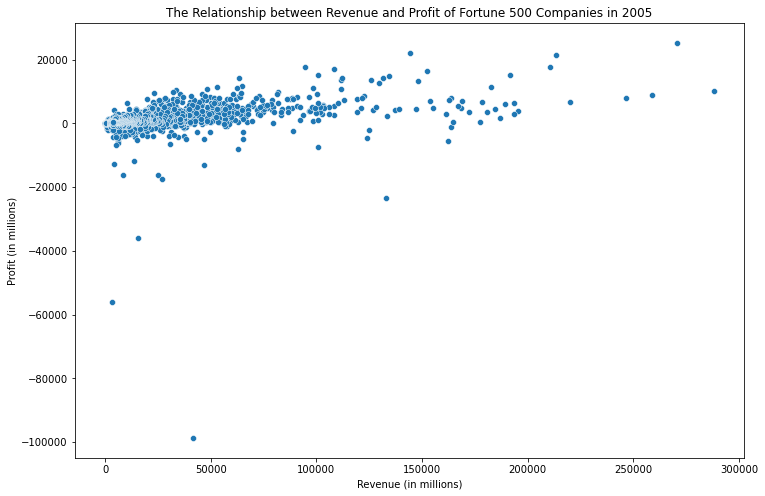

In [30]:
# Example of a scatter plot for showing the relationship between two numeric variables
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Revenue (in millions)", y="Profit (in millions)")
plt.title("The Relationship between Revenue and Profit of Fortune 500 Companies in 2005");
plt.xlabel("Revenue (in millions)");
plt.ylabel("Profit (in millions)");

### 4. Make your visualization accessible and ethical
One of the goals of data visualization is to draw attention to the important points or findings in your data. You can use various techniques to emphasize the important points, such as:

- Use colors, shapes, or symbols to distinguish different groups or categories
- Use contrast, brightness, or saturation to highlight or dim certain elements
- Use size, position, or orientation to show hierarchy or order
- Use animation, interaction, or annotation to show changes or relationships
- Use charts within charts, such as sparklines or small multiples, to show details or comparisons

However, you should also be careful not to overuse or misuse these techniques, as they can also create confusion, distraction, or bias. You should use them sparingly, consistently, and intentionally, and always check if they support or distort your message.

This is a good practice because it helps you draw attention to the important points or findings in your data, and to make your visualization more impactful and memorable. For example, you can use colors, shapes, or symbols to distinguish different groups or categories, use contrast, brightness, or saturation to highlight or dim certain elements, use size, position, or orientation to show hierarchy or order, use animation, interaction, or annotation to show changes or relationships, and use charts within charts, such as sparklines or small multiples, to show details or comparisons.

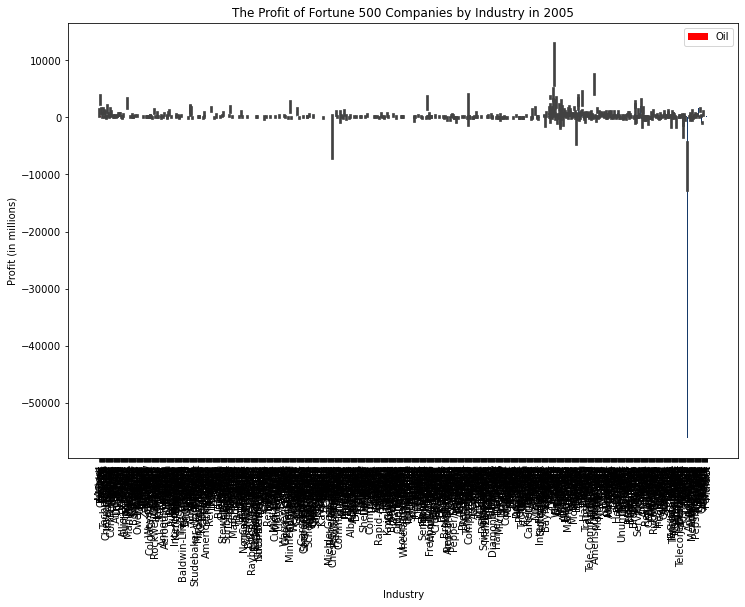

In [35]:
# Example of a visualization with emphasized important points
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="Industry", y="Profit (in millions)", palette="Blues")
plt.title("The Profit of Fortune 500 Companies by Industry in 2005")
plt.xlabel("Industry")
plt.ylabel("Profit (in millions)")
plt.xticks(rotation=90)
plt.bar(3, df[df["Industry"] == "Oil"]["Profit (in millions)"].mean(), color="red", label="Oil")
plt.legend();